<a href="https://colab.research.google.com/github/h-wenxuan/cardiovascular-prediction/blob/main/CardiovascularPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Basic Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Import the data set

In [3]:
#import cardio_train.csv
cardiodata = pd.read_csv('cardio_train.csv', sep=';')
cardiodata.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
cardiodata.info()
print("Data dims : ", cardiodata.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
Data dims :  (70000, 13)


## Clean data
### - Remove 'id' and duplicates
### - convert age to years, calculate bmi(using height and weight) and height to metre
### - remove ap_hi and ap_lo that do not fall within the range in the table shown in health hub

In [5]:
cardiodata = cardiodata.drop('id', axis=1) #remove unnecessary column

In [6]:
#drop duplicates row
initial_rows = len(cardiodata)
cardiodata = cardiodata.drop_duplicates()
rows_dropped = initial_rows - len(cardiodata)
print("The numbers of duplicated rows dropped is: ", rows_dropped)
print("Data dims : ", cardiodata.shape)

The numbers of duplicated rows dropped is:  24
Data dims :  (69976, 12)


In [7]:
#Change age in days to year by using round which round to the nearest whole number adn make it into integer
#Average length of a year is 365.25 days according to the Julian Calendar which is used by NASA
#https://www.grc.nasa.gov/www/k-12/Numbers/Math/Mathematical_Thinking/calendar_calculations.htm
cardiodata['age'] = round(cardiodata['age'] / 365.25, 0).astype(int)
cardiodata.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
#Summary Statistics of Uni-Variate Series
cardiodata.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,53.303404,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,6.760509,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<Axes: ylabel='Count'>

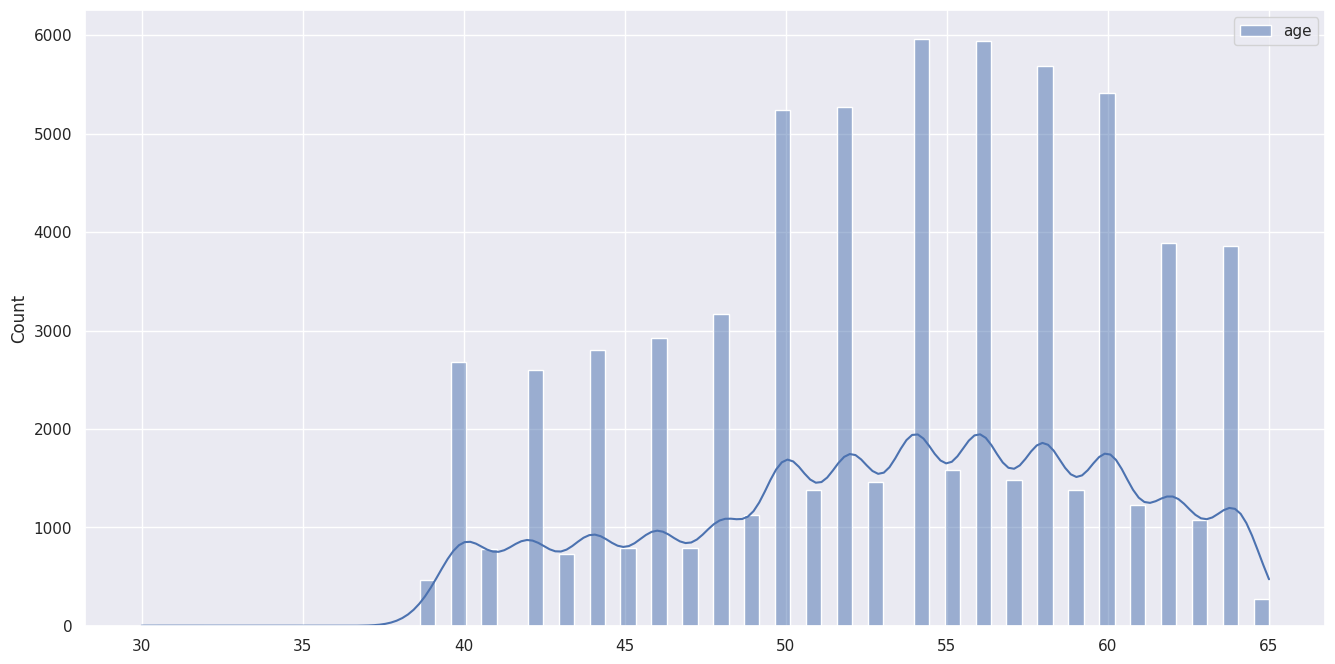

In [9]:
#Print age histogram chart
#this table proves that the health hub chart can be used(age range compatible)
age = pd.DataFrame(cardiodata['age'])
f = plt.figure(figsize=(16, 8))
sb.histplot(data = age, kde = True)

In [10]:
#https://www.healthhub.sg/live-healthy/weight_putting_me_at_risk_of_health_problems
# Convert height to meters (divide by 100)
cardiodata['height_m'] = cardiodata['height'] / 100

# Calculate BMI for each row
cardiodata['bmi'] = cardiodata['weight'] / (cardiodata['height_m'] ** 2)

# Round BMI values to one decimal point
cardiodata['bmi'] = cardiodata['bmi'].round(1)

# Insert BMI values to column 2
cardiodata.insert(2,'bmi', cardiodata.pop('bmi'))

cardiodata.head()

,age,gender,bmi,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_m
0,50,2,22.0,168,62.0,110,80,1,1,0,0,1,0,1.68
1,55,1,34.9,156,85.0,140,90,3,1,0,0,1,1,1.56
2,52,1,23.5,165,64.0,130,70,3,1,0,0,0,1,1.65
3,48,2,28.7,169,82.0,150,100,1,1,0,0,1,1,1.69
4,48,1,23.0,156,56.0,100,60,1,1,0,0,0,0,1.56


In [11]:
# drop bmi>42 and bmi<12
#http://darienprimary.com/handouts/BMI.html
cardiodata = cardiodata.drop(columns=['height', 'weight', 'height_m'])
initial_rows = len(cardiodata)
cardiodata.drop(cardiodata.query('bmi > 40 or bmi < 18.5').index, axis=0, inplace=True)
rows_dropped2 = initial_rows - len(cardiodata)
print("The number of rows bmi is: ", rows_dropped2)
cardiodata.head()

The number of rows bmi is:  2475


,age,gender,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,22.0,110,80,1,1,0,0,1,0
1,55,1,34.9,140,90,3,1,0,0,1,1
2,52,1,23.5,130,70,3,1,0,0,0,1
3,48,2,28.7,150,100,1,1,0,0,1,1
4,48,1,23.0,100,60,1,1,0,0,0,0


In [12]:
#Since the age range mainly rangest from late 30s to about 65 years old, we can use Singapore's chart to futher clean the data
#Remove ap_hi>160, ap_low>100 and ap_high<90, ap_low<60 and print number of rows dropped
#https://www.healthhub.sg/a-z/diseases-and-conditions/postural-hypotension
#https://www.healthhub.sg/a-z/diseases-and-conditions/understanding-blood-pressure-readings
initial_rows = len(cardiodata)
cardiodata.drop(cardiodata.query('ap_hi > 160 or ap_lo > 100 or ap_hi < 90 or ap_lo < 60').index, axis=0, inplace=True)
rows_dropped3 = initial_rows - len(cardiodata)
print("The number of rows dropped for blood pressure is: ", rows_dropped3)
print("The number of rows dropped in total is: ", rows_dropped2 + rows_dropped + rows_dropped3)

The number of rows dropped for blood pressure is:  3190
The number of rows dropped in total is:  5689


In [13]:
#categorise the blood pressure according to health hub

def BPCategorize(x,y):
    if 90<=x<=120 and 60<=y<=80: #Normal BP
        return 1
    elif 120<=x<=130 or 80<=y<=89: #High-normal BP
        return 2
    elif 130<=x<=140 or 89<=y<=90: #High BP
        return 3
    elif 140<=x<=159 or 90<=y<=99: #Stage 1 Hypertension
        return 4
    elif x==160 or y==100: #Stage 2 Hypertension
        return 5
    else:
        return 6

cardiodata.insert(2, "bp_cat", cardiodata.apply(lambda row: BPCategorize(row['ap_hi'], row['ap_lo']), axis=1))
cardiodata['bp_cat'].value_counts()

bp_cat
1    37748
2    13755
3    10348
4     1318
5     1142
Name: count, dtype: int64

In [14]:
#since we using bp cat, we can drop ap_hi and ap_lo from the dataset
cardiodata = cardiodata.drop(columns=['ap_hi', 'ap_lo'])

In [15]:
cardiodata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64311 entries, 0 to 69999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          64311 non-null  int64  
 1   gender       64311 non-null  int64  
 2   bp_cat       64311 non-null  int64  
 3   bmi          64311 non-null  float64
 4   cholesterol  64311 non-null  int64  
 5   gluc         64311 non-null  int64  
 6   smoke        64311 non-null  int64  
 7   alco         64311 non-null  int64  
 8   active       64311 non-null  int64  
 9   cardio       64311 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 5.4 MB


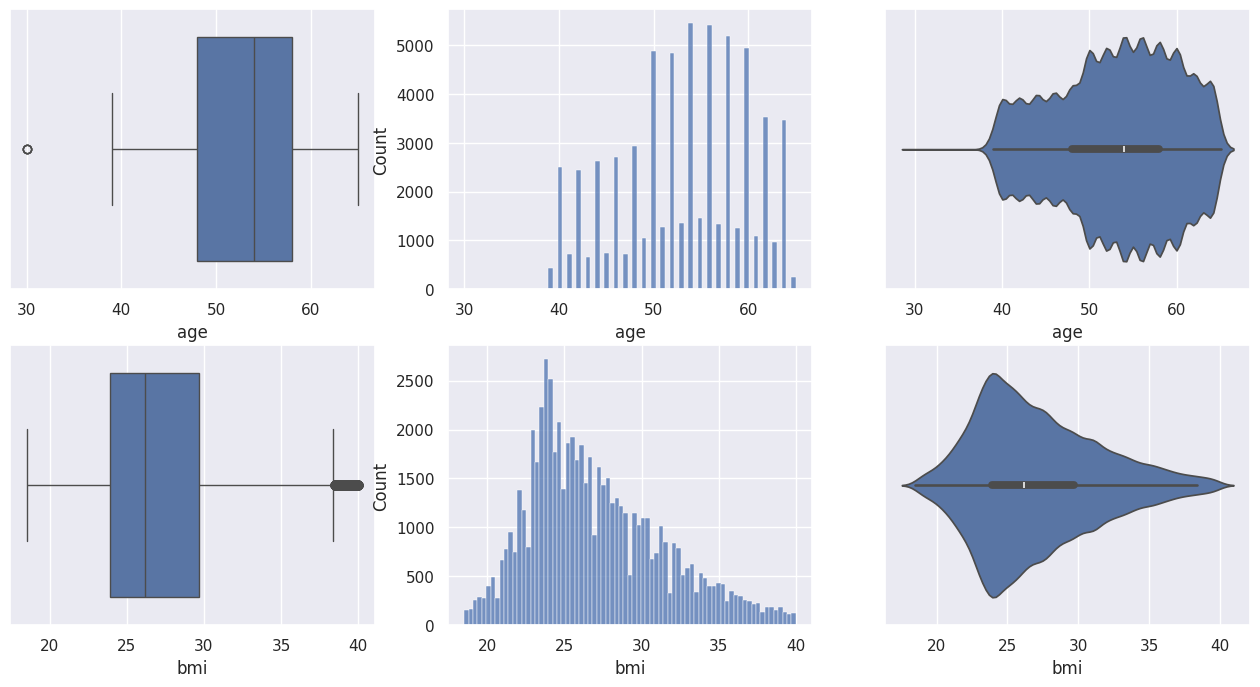

In [16]:
# Extract only the numeric data variables
continuousDT = pd.DataFrame(cardiodata[["age", "bmi"]])

# Draw the distributions of all variables
f, axes = plt.subplots(2, 3, figsize=(16, 8))

count = 0
for var in continuousDT:
    sb.boxplot(data = continuousDT[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = continuousDT[var], ax = axes[count,1])
    sb.violinplot(data = continuousDT[var], orient = "h", ax = axes[count,2])
    count += 1

<ipython-input-17-124fa1cff92a>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  sb.countplot(x="cardio", data=cardiodata, ax=ax[0,0]).set_xticklabels(['No-cardio', 'Cardio'])
<ipython-input-17-124fa1cff92a>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  sb.countplot(x="gender", data=cardiodata, ax=ax[0,1]).set_xticklabels(['Female', 'Male'])
<ipython-input-17-124fa1cff92a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  sb.countplot(x="gluc", data=cardiodata, ax=ax[1,0]).set_xticklabels(['normal', 'above normal', 'well above normal'])
<ipython-input-17-124fa1cff92a>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  sb.countplot(x="cholesterol", data=cardiodata, ax=ax[1,1]).set_xticklabels(['normal', 'above normal', 'well above normal'])
<ipython-input-17-124fa1cff92a>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  sb.countplot(x

[Text(0, 0, 'Normal BP'),
 Text(1, 0, 'High-Normal BP'),
 Text(2, 0, 'High BP'),
 Text(3, 0, 'Stage 1 Hypertension'),
 Text(4, 0, 'Stage 2 Hypertension')]

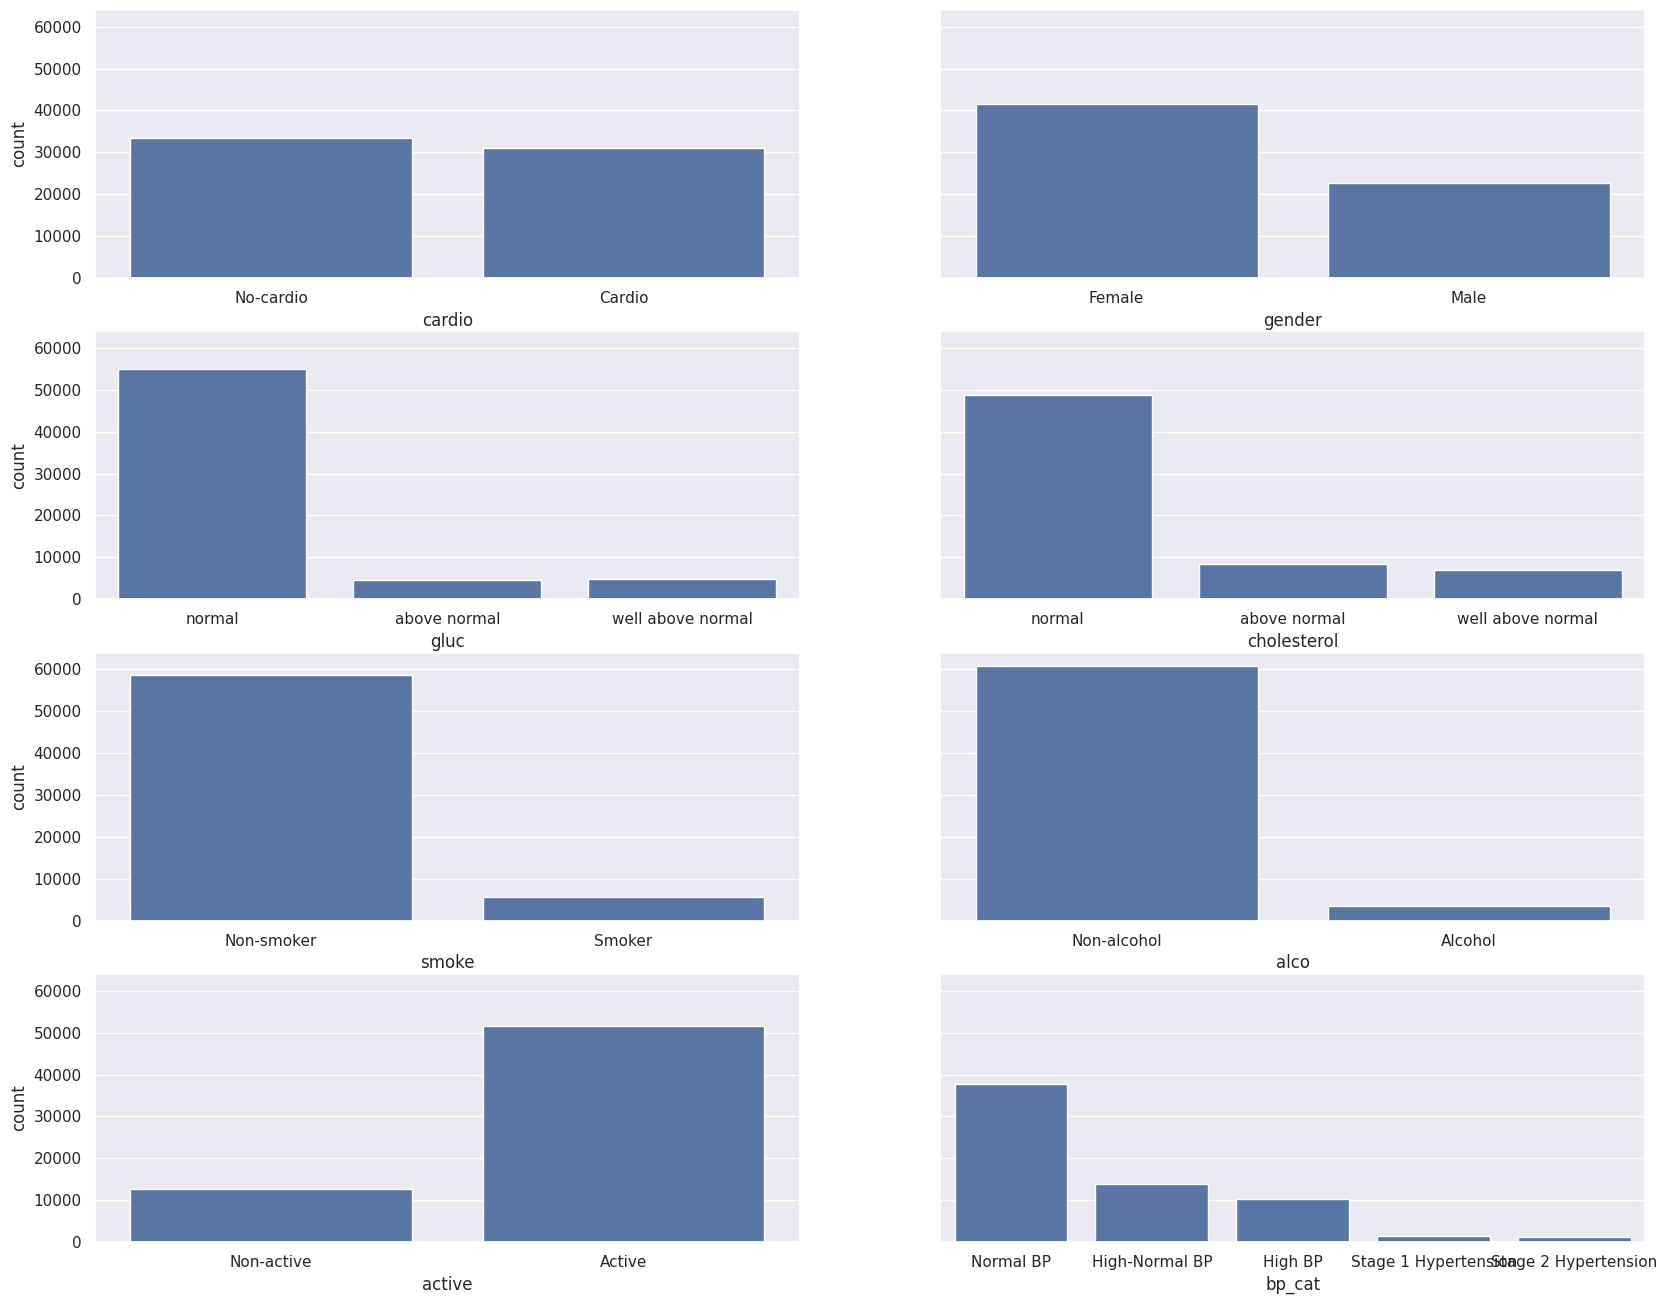

In [17]:
#plot countplot for each of the categorical/discrete variables
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(20,16), sharey=True)

sb.countplot(x="cardio", data=cardiodata, ax=ax[0,0]).set_xticklabels(['No-cardio', 'Cardio'])
sb.countplot(x="gender", data=cardiodata, ax=ax[0,1]).set_xticklabels(['Female', 'Male'])
sb.countplot(x="gluc", data=cardiodata, ax=ax[1,0]).set_xticklabels(['normal', 'above normal', 'well above normal'])
sb.countplot(x="cholesterol", data=cardiodata, ax=ax[1,1]).set_xticklabels(['normal', 'above normal', 'well above normal'])
sb.countplot(x="smoke", data=cardiodata, ax=ax[2,0]).set_xticklabels(['Non-smoker', 'Smoker'])
sb.countplot(x="alco", data=cardiodata, ax=ax[2,1]).set_xticklabels(['Non-alcohol', 'Alcohol'])
sb.countplot(x="active", data=cardiodata, ax=ax[3,0]).set_xticklabels(['Non-active', 'Active'])
sb.countplot(x="bp_cat", data=cardiodata, ax=ax[3,1]).set_xticklabels(['Normal BP', 'High-Normal BP', 'High BP','Stage 1 Hypertension', 'Stage 2 Hypertension'])
#does not include age, bmi(continuous)

<ipython-input-18-4708bc95258f>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['No-cardio', 'Cardio'])
<ipython-input-18-4708bc95258f>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(['No-cardio', 'Cardio'])


[Text(0, 0, 'No-cardio'), Text(0, 1, 'Cardio')]

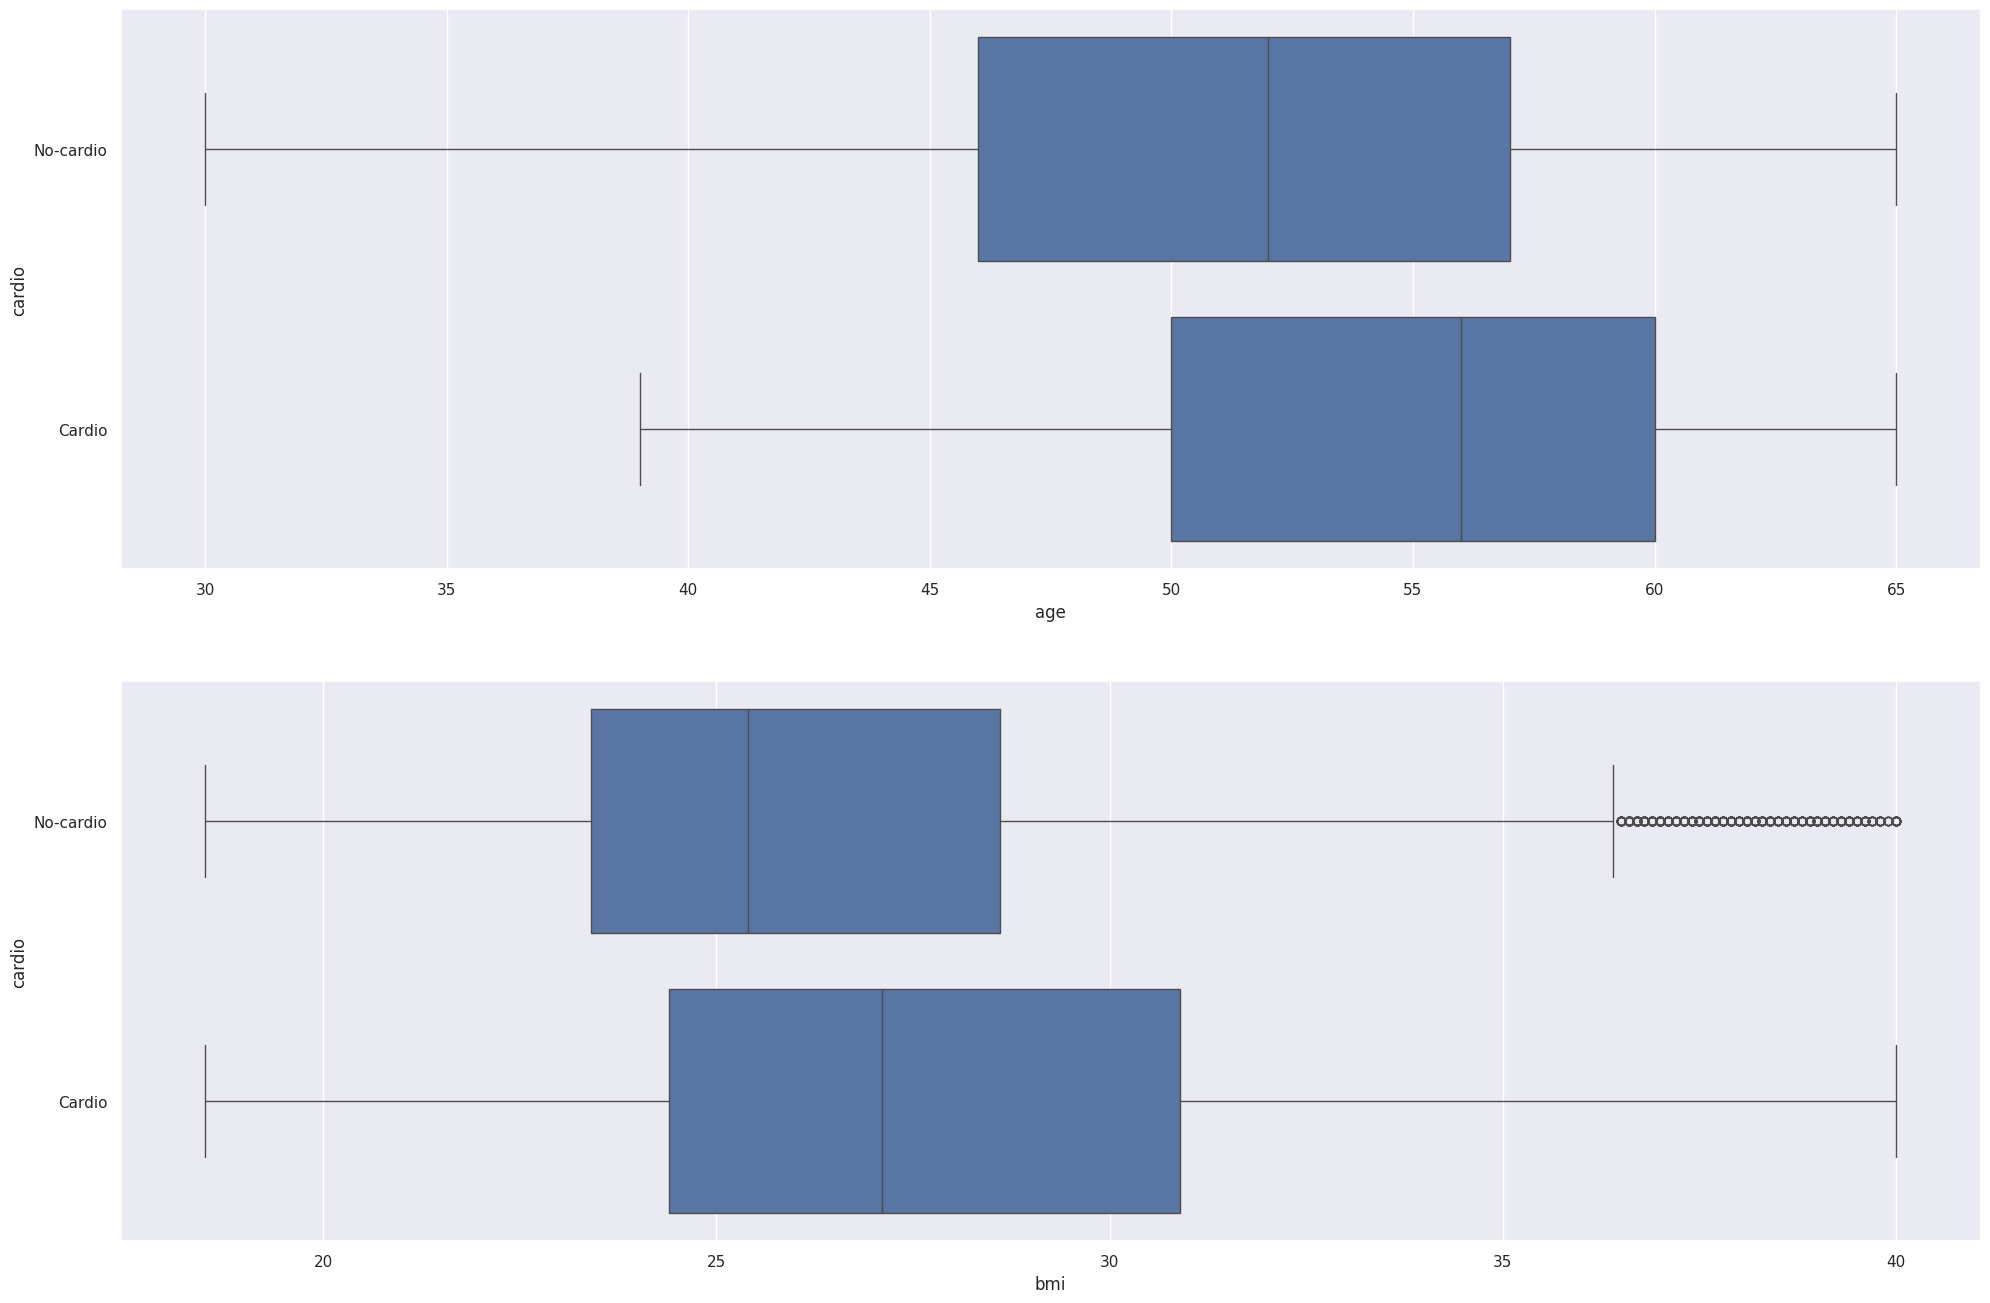

In [18]:
#plot age and bmi (continuous variables) against cardio
fig, ax = plt.subplots(nrows=2, figsize=(24,16))
sb.boxplot(data=cardiodata, x='age', y='cardio', ax=ax[0], orient = "h")
sb.boxplot(data=cardiodata, x='bmi', y='cardio', ax=ax[1], orient = "h")

ax[0].set_yticklabels(['No-cardio', 'Cardio'])
ax[1].set_yticklabels(['No-cardio', 'Cardio'])

<ipython-input-19-05901e4d7dbd>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(['Women', 'Men'])
<ipython-input-19-05901e4d7dbd>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(['Normal', 'Above normal', 'Well above normal'])
<ipython-input-19-05901e4d7dbd>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(['Normal', 'Above normal', 'Well above normal'])
<ipython-input-19-05901e4d7dbd>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(['Non-smoker', 'Smoker'])
<ipython-input-19-05901e4d7dbd>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(['Non-alcohol', 'Alcohol'])
<ipython-input-19-05901e4d7dbd>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(['Non-ac

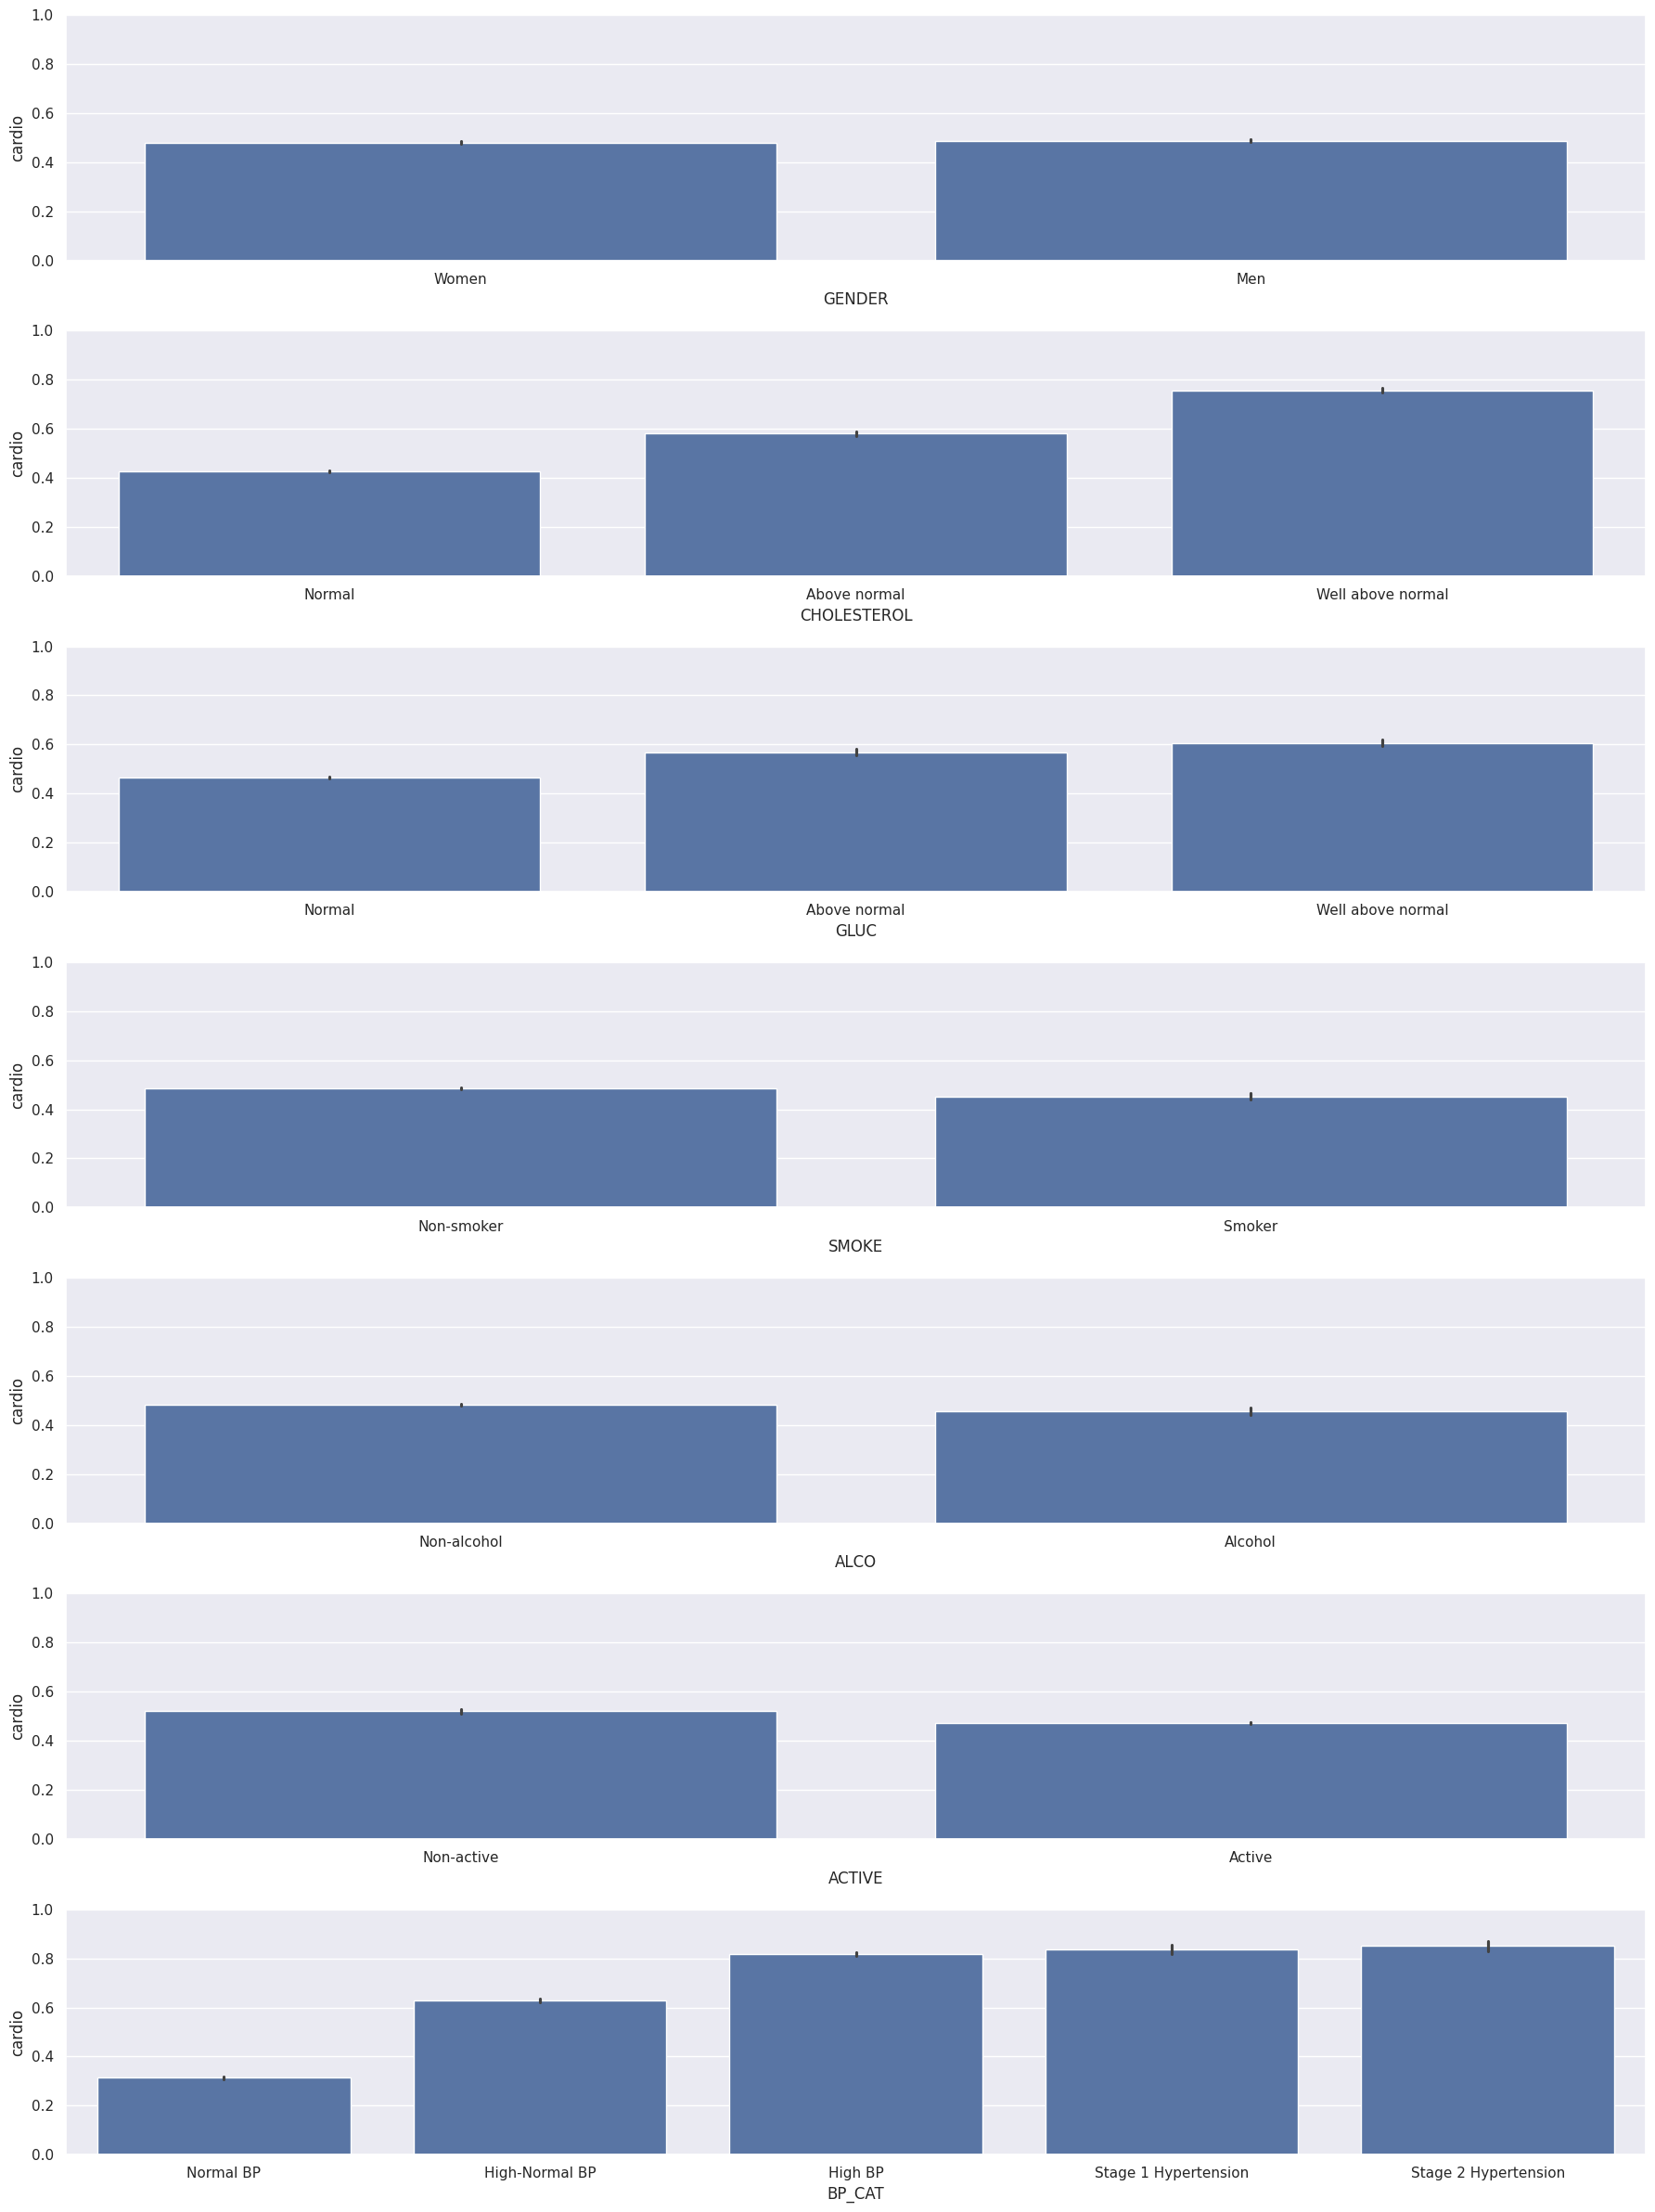

In [19]:
#plot discrete variables against cardio
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming discreteDT contains the columns 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp_cat'
discreteDT = cardiodata[['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp_cat']]
# Create subplots
f, axes = plt.subplots(7, 1, figsize=(18, 24))
for i, var in enumerate(discreteDT.columns):
    sns.barplot(x=var, y='cardio', data=cardiodata, ax=axes[i])
    axes[i].set(ylim=(0, 1))  # Set y-axis limit to 1
    axes[i].set_xlabel(var.upper(), fontsize=12)
    if i == 0:
        axes[i].set_xticklabels(['Women', 'Men'])
    elif i == 1 or i == 2:
        axes[i].set_xticklabels(['Normal', 'Above normal', 'Well above normal'])
    elif i == 3:
        axes[i].set_xticklabels(['Non-smoker', 'Smoker'])
    elif i == 4:
        axes[i].set_xticklabels(['Non-alcohol', 'Alcohol'])
    elif i == 5:
        axes[i].set_xticklabels(['Non-active', 'Active'])
    elif i == 6:
        axes[i].set_xticklabels(['Normal BP', 'High-Normal BP', 'High BP','Stage 1 Hypertension', 'Stage 2 Hypertension'])
plt.tight_layout()
plt.show()

<Axes: >

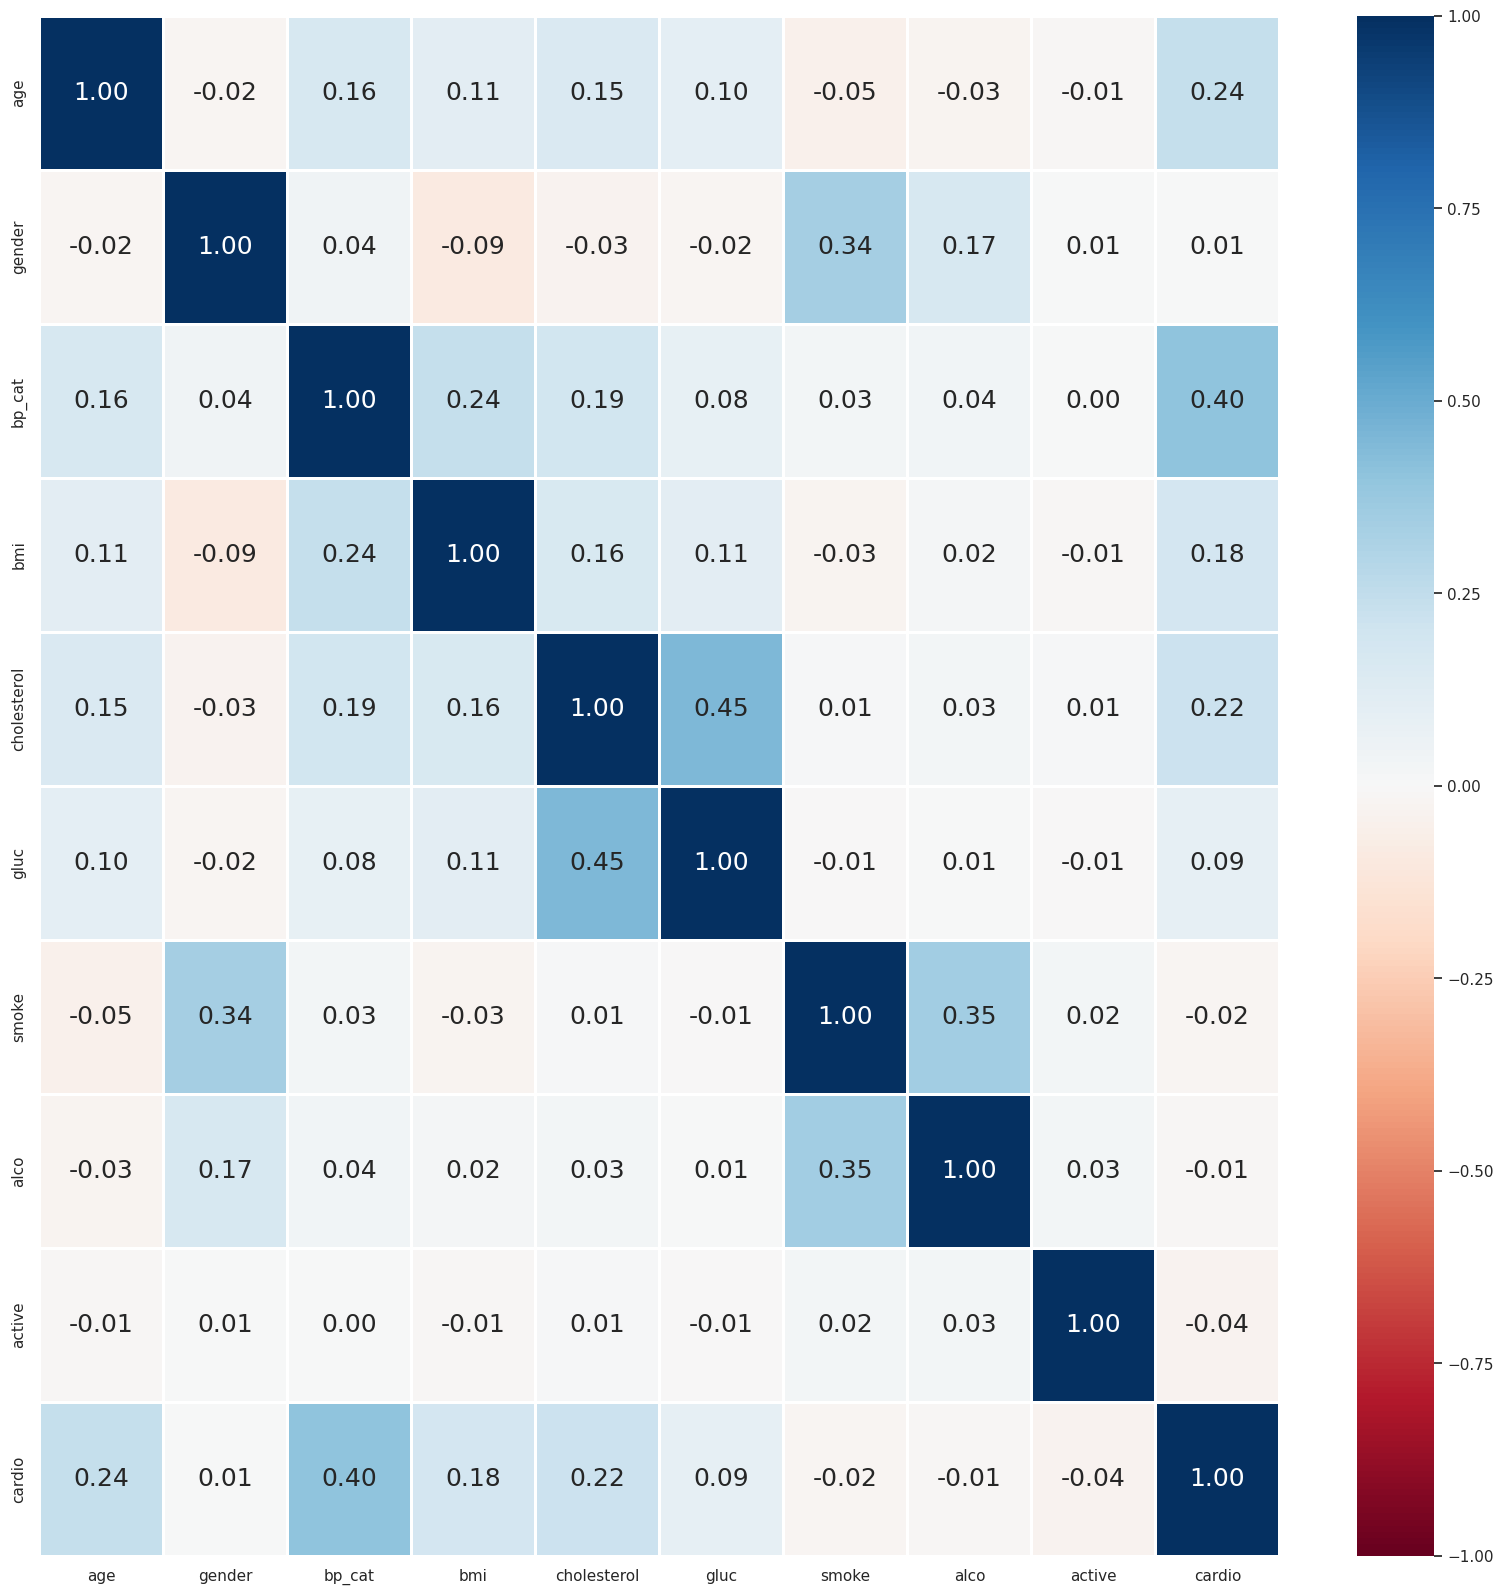

In [20]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(cardiodata.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

# Decision Tree (Machine Learning)

In [21]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(cardiodata['cardio'])
X = cardiodata.drop('cardio', axis=1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7111979918697381

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7122939774023013



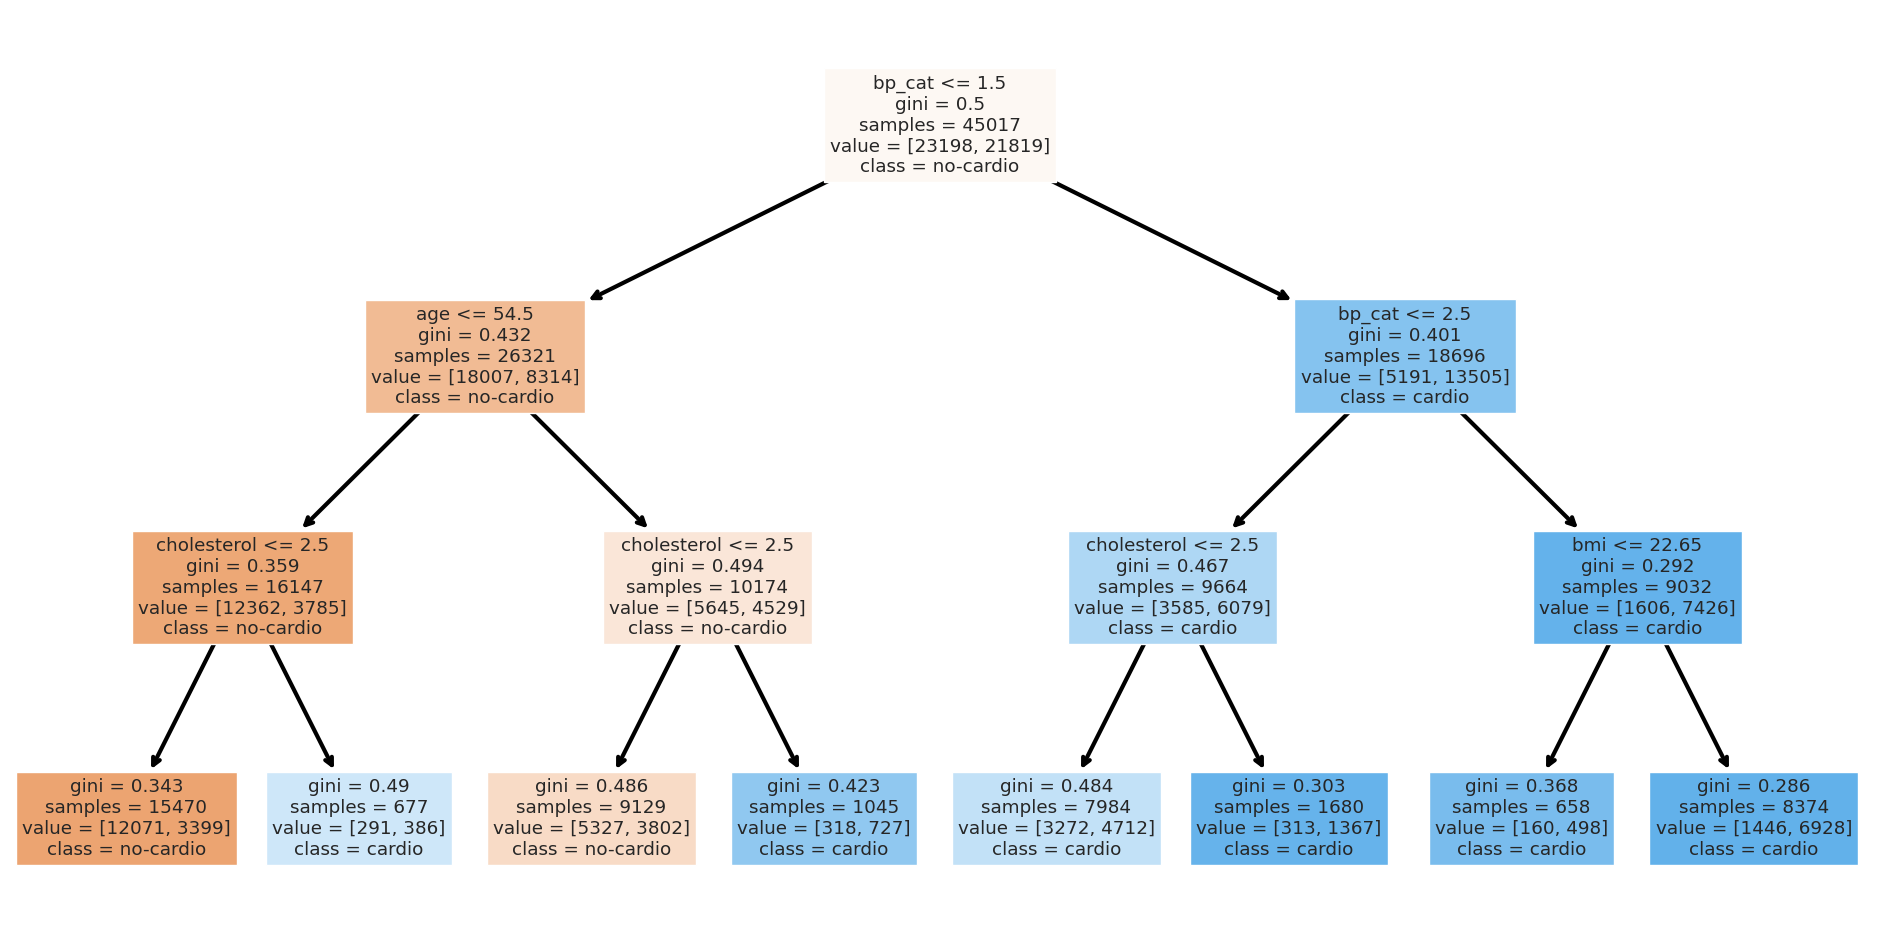

In [22]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(24, 12))
out = plot_tree(dectree,
          feature_names = list(X_train.columns),
          class_names = ["no-cardio", "cardio"],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

plt.show()

## Feature Importance

<Axes: ylabel='Feature'>

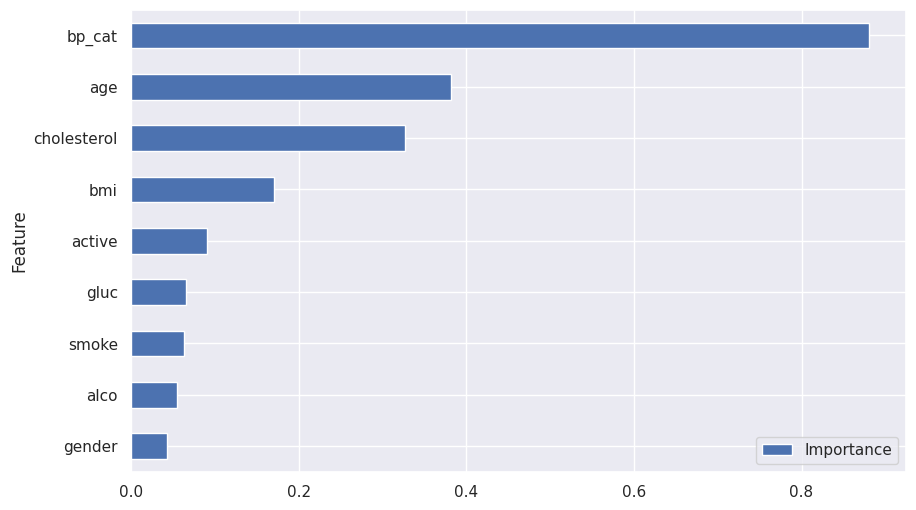

In [23]:
X = cardiodata.drop('cardio', axis=1)
y = cardiodata['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)


coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

## Remove variables that are not used for prediction

In [24]:
cardioimpt = cardiodata.drop(columns=['alco', 'smoke', 'active', 'gender', 'gluc'])
cardioimpt.head()

,age,bp_cat,bmi,cholesterol,cardio
0,50,1,22.0,1,0
1,55,3,34.9,3,1
2,52,2,23.5,3,1
3,48,4,28.7,1,1
4,48,1,23.0,1,0


## Logistic Regression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate the features and target variable
X = cardioimpt.drop('cardio', axis=1)  # Features
y = cardioimpt['cardio']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix:")
print(cm)

Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.70      0.79      0.74     10056
           1       0.73      0.62      0.67      9238

    accuracy                           0.71     19294
   macro avg       0.71      0.71      0.71     19294
weighted avg       0.71      0.71      0.71     19294

Confusion Matrix:
[[7919 2137]
 [3469 5769]]


## Prediction

In [26]:
# Assuming you already have the trained model (model) and the features (bmi and blood_pressure) defined
# Input your values for BMI and blood pressure
age_value = int(input("Age of person: "))
while age_value < 0 or age_value > 130:
    print("Error, input a correct value")
    age_value = int(input("Age of person: "))

bp_cat_value = int(input("Blood pressure category of person(1/2/3/4/5) based on table: "))
while bp_cat_value < 1 or bp_cat_value > 5:
    print("Error, input a correct value")
    bp_cat_value = int(input("Blood pressure category of person (1/2/3/4/5) based on table: "))

bmi_value = float(input("BMI value of person(to 1 d.p): "))
while bmi_value > 40 or bmi_value < 18.5:
    print("Error, input a correct value")
    bmi_value = float(input("BMI value of person(to 1 d.p): "))

cholesterol_value = int(input("Cholestrol level of person(1,2,3): "))
while cholesterol_value < 1 or cholesterol_value > 5:
    print("Error, input a correct value")
    cholesterol_value = int(input("Cholestrol level of person(1,2,3): "))

# Create a DataFrame with the input values
input_data = pd.DataFrame({'age': [age_value], 'bp_cat': [bp_cat_value], 'bmi': [bmi_value], 'cholesterol': [cholesterol_value]})

# Use the trained model to make predictions
prediction = model.predict(input_data)

if prediction == 1:
    print("Cardiovascular Disease is predicted.")
else:
    print("No Cardiovascular Disease is predicted.")

Age of person: 30
Blood pressure category of person(1/2/3/4/5) based on table: 2
BMI value of person(to 1 d.p): 3
Error, input a correct value
BMI value of person(to 1 d.p): 1
Error, input a correct value
BMI value of person(to 1 d.p): 30
Cholestrol level of person(1,2,3): 2
No Cardiovascular Disease is predicted.


# Accuracy of prediction

<Axes: >

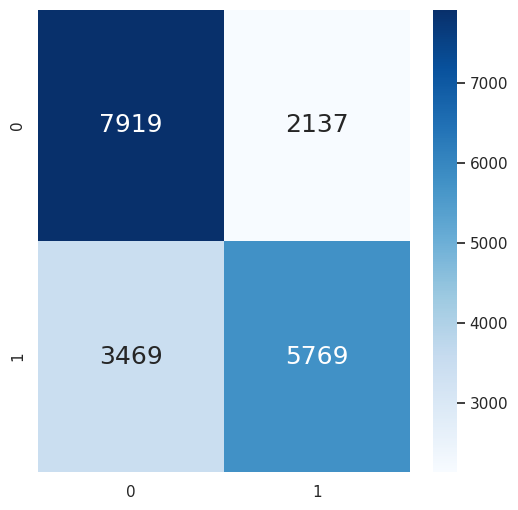

In [27]:
# Plot the Confusion Matrix for Test
f, axes = plt.subplots(figsize=(6, 6))
sb.heatmap(confusion_matrix(y_test, y_pred_test),
           annot = True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")

## ROC - research more

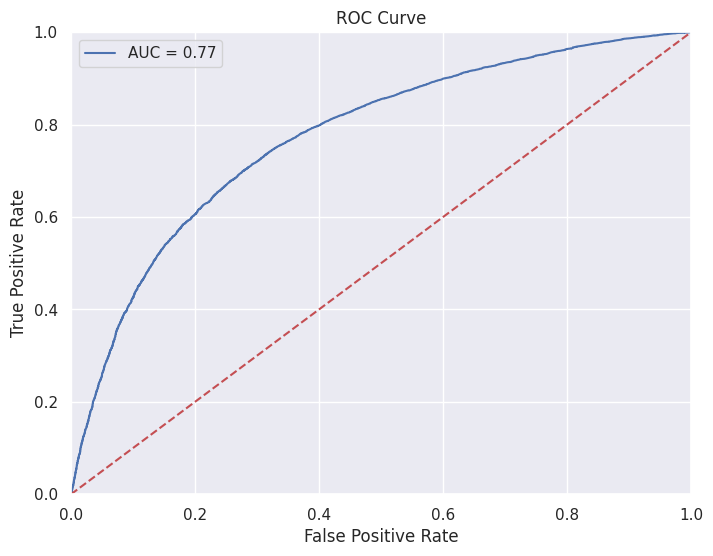

In [28]:
#https://www.statology.org/plot-roc-curve-python/
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities on the test set
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC-ROC score
auc = roc_auc_score(y_test, y_probs)

import matplotlib.pyplot as plt

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()